In [1]:
import numpy as np
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import pickle
import csv

### Ejercicio 1: Operaciones Matriciales

In [2]:
def norm_l0(X):
    return np.sum(X!=0, axis=1)

def norm_lp(X,p):
    return (np.sum(np.abs(X**p), axis=1)** 1/p)
    
def norm_linf(X):
    return np.max(X, axis=1)

In [3]:
a = np.random.randint(low=0, high=10, size=(5,10), dtype=int)
print("matrix = \n"+str(a))
print("\nnorm_l0 = " +str(norm_l0(a)))
print("\nnorm_l1 = " +str(norm_lp(a,1)))
print("\nnorm_l2 = " +str(norm_lp(a,2)))
print("\nnorm_l-inf = " +str(norm_linf(a)))

matrix = 
[[7 1 6 4 1 6 7 1 8 5]
 [2 3 9 4 5 1 9 5 3 7]
 [6 4 5 1 1 1 7 4 5 5]
 [1 8 4 2 3 8 9 2 2 5]
 [5 4 8 6 7 2 9 4 6 1]]

norm_l0 = [10 10 10 10 10]

norm_l1 = [46. 48. 39. 44. 52.]

norm_l2 = [139.  150.   97.5 136.  164. ]

norm_l-inf = [8 9 7 9 9]


### Ejercicio 2: Sorting

In [4]:
a = np.random.randint(low=0, high=10, size=(5,10), dtype=int)
l2 = norm_lp(a,2)
# l2_sorted = np.sort(l2)[::-1]
arg_sort = np.argsort(-l2) # If you negate an array, the lowest elements become the highest elements and vice-versa.
a_sorted = a[arg_sort,:]

print("matrix = \n"+str(a))
print("\nnorm_l2 = " +str(l2))
print("\nnsorted matrix = " +str(a_sorted))

matrix = 
[[5 3 1 0 4 3 7 6 7 9]
 [6 1 3 0 8 9 3 4 6 1]
 [7 9 0 4 1 6 7 9 9 4]
 [7 9 4 2 4 2 3 6 3 7]
 [1 9 9 6 2 0 0 0 2 2]]

norm_l2 = [137.5 126.5 205.  136.5 105.5]

nsorted matrix = [[7 9 0 4 1 6 7 9 9 4]
 [5 3 1 0 4 3 7 6 7 9]
 [7 9 4 2 4 2 3 6 3 7]
 [6 1 3 0 8 9 3 4 6 1]
 [1 9 9 6 2 0 0 0 2 2]]


### Ejercicio 3: Indexing

In [5]:
class Indexing():
    def __init__(self, ids):        
        self.users_id = ids
        self.users_cant = len(ids)
        self.users_index = np.arange(self.users_cant)
        
    def get_users_id(self, indx):
        if indx>=0 and indx<self.users_cant:
            return self.users_id[indx]
        return -1
    
    def get_users_idx(self, id):
        if(np.isin(id, self.users_id)):
            return np.where(self.users_id==id)[0][0]
        return -1

In [6]:
users_id = np.array([15, 12, 14, 10, 1, 2, 1, 3])
indexing = Indexing(users_id)

print("get_users_id(3) = "+str(indexing.get_users_id(3)))
print("get_users_id(40) = "+str(indexing.get_users_id(40)))
print("get_users_idx(10) = "+str(indexing.get_users_idx(10)))
print("get_users_idx(100) = "+str(indexing.get_users_idx(100)))

get_users_id(3) = 10
get_users_id(40) = -1
get_users_idx(10) = 3
get_users_idx(100) = -1


### Ejercicio 4: Precision, Recall, Accuracy

In [7]:
import numpy as np

def get_tp(truth,pred):
    return np.sum((truth==1)*(pred==1))

def get_tn(truth,pred):
    return np.sum((truth==0)*(pred==0))
    
def get_fn(truth,pred):
    return np.sum((truth==1)*(pred==0))

def get_fp(truth,pred):
    return np.sum((truth==0)*(pred==1))

def precision(truth,pred):
    tp = get_tp(truth,pred)
    fp = get_fp(truth,pred)
    return tp / (tp + fp)

def recall(truth,pred):
    tp = get_tp(truth,pred)
    fn = get_fn(truth,pred)
    return tp / (tp + fn)

def accuracy2(truth,pred):
    tp = get_tp(truth,pred)
    tn = get_tn(truth,pred)
    fp = get_fp(truth,pred)
    fn = get_fn(truth,pred)
    return (tp + tn) / (tp + tn + fp + fn)

def accuracy(truth,pred):
    return np.sum(truth==pred) / truth.shape[0]

truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

print('precision = ' + str(precision(truth,prediction)))
print('recall = ' + str(recall(truth,prediction)))
print('accuracy = ' + str(accuracy(truth,prediction)))
print('accuracy2 = ' + str(accuracy2(truth,prediction)))

precision = 0.5
recall = 0.5
accuracy = 0.4
accuracy2 = 0.4


### Ejercicio 5: Average Query Precision

In [8]:
def average_query_precision(q_id,truth_relevance):
    unique_id = np.unique(q_id)
    
    # Get ID count for true cases
    true_id = q_id[truth_relevance]
    truth_by_id = np.bincount(true_id)[unique_id]
    
    # Get True cases count by id
    total_by_id = np.bincount(q_id)[unique_id]
    
    return np.mean((truth_by_id/total_by_id))

In [9]:
q_id =             np.array([1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4])
predicted_rank =   np.array([0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3])
truth_relevance =  np.array([True, False, True, False, True, True, True, False, 
                    False, False, False, False, True, False, False, True])

print("average query precision = "+str(average_query_precision(q_id,truth_relevance)))

average query precision = 0.5


### Ejercicio 6: Distancia a Centroides

In [10]:
# Ejemplo para un solo punto (sin expandir C)
x = np.array([1, 2, 3])
c = np.array([[1, 0, 0], [0, 1, 1]])
dist = np.sqrt(np.sum((x-c)**2,axis=1))
print("\nDist = "+str(dist))


Dist = [3.60555128 2.44948974]


In [11]:
def get_dist(X,C):
    C_exp = C[:, None]
    return np.sqrt(np.sum((X-C_exp)**2,axis=2))

In [12]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
C = np.array([[1, 0, 0], [0, 1, 1]])
dist = get_dist(X,C)

print("Broadcasting:")
print("C_exp.shape = \t\t"+str(C[:, None].shape))
print("X.shape = \t\t   "+str(X.shape))
print("(X-C_exp).shape = \t"+str((X-C[:, None]).shape))
print("\nDistances: \n C0 = "+str(dist[0])+"\n C1 = "+str(dist[1]))

Broadcasting:
C_exp.shape = 		(2, 1, 3)
X.shape = 		   (3, 3)
(X-C_exp).shape = 	(2, 3, 3)

Distances: 
 C0 = [ 3.60555128  8.36660027 13.45362405]
 C1 = [ 2.44948974  7.54983444 12.72792206]


### Ejercicio 7: Etiquetar Cluster

In [13]:
def get_cluster(X,C):
    dist = get_dist(X,C)
    return np.argmin(dist,axis=0)

In [14]:
print("Clusters = "+str(get_cluster(X,C)))

Clusters = [1 1 1]


### Ejercicio 8: Implementación Básica de K-means

In [15]:
def get_centroids(X,C,clusters):
    for i in range(C.shape[0]):
        C[i] = np.mean(X[clusters==i],axis=0)
    return C
    
def kmeans(X,n,iterations=1000):
    # Init centroids from random elements of X
    C = X[np.random.choice(X.shape[0], n, replace=False), :]
        
    # Iteration
    for i in range(iterations):
        clusters = get_cluster(X,C)
        C = get_centroids(X,C,clusters)
        
    return C, clusters

Centroids = 
[[74.74710801 32.42559672]
 [50.9469129  78.53968801]
 [21.23253415 27.93272577]]

Clusters = 
[0 1 2 0 2 2 1 2 0 1 1 2 1 2 2 1 1 0 0 2 0 1 0 0 1 0 1 1 1 2 2 1 1 0 2 1 2
 2 1 2 2 2 1 1 0 1 0 0 1 2 1 1 2 0 2 1 1 1 2 2 2 0 1 1 0 0 0 2 0 1 2 2 1 0
 1 1 1 2 1 0 0 0 0 1 1 1 1 1 1 2 0 2 1 0 1 0 1 2 1 0]


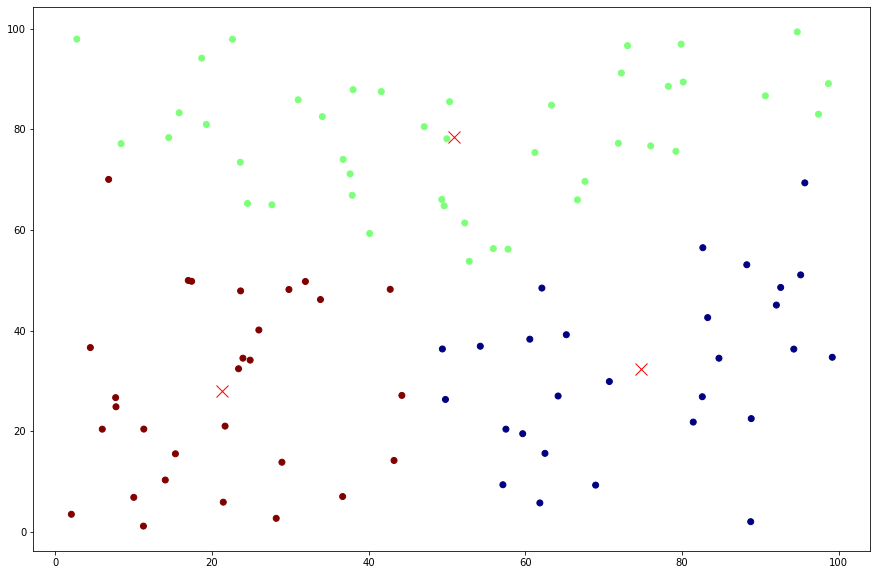

In [16]:
a = np.random.uniform(low=0., high=100., size=(100,2))
n = 3
C , clusters = kmeans(a,n)

print("Centroids = \n"+str(C))
print("\nClusters = \n"+str(clusters))

fig_class, ax = plt.subplots(figsize=(15,10))
sc = ax.scatter(a[:,0], a[:,1], alpha=1,c=clusters,cmap='jet')
for c in C:
    plt.plot(c[0],c[1],'rx', markersize=12)

### Ejercicio 9:  Computar Métricas con \_\_call\_\_

In [17]:
class Metrics():
    
    def __init__(self,**kwargs):
        self.data = kwargs
        self.__metrics_list = [self.precision,self.recall,self.accuracy]
        self.metrics = {}
        
    def __call__(self):
        for m in self.__metrics_list:
            self.metrics[m.__name__] = m(**self.data)
        return self.metrics
    
    def __get_tp(self,truth,pred):
        return np.sum((truth==1)*(pred==1))

    def __get_tn(self,truth,pred):
        return np.sum((truth==0)*(pred==0))

    def __get_fn(self,truth,pred):
        return np.sum((truth==1)*(pred==0))

    def __get_fp(self,truth,pred):
        return np.sum((truth==0)*(pred==1))

    def precision(self,**kwargs):
        truth = kwargs['truth']
        pred = kwargs['prediction']
        tp = self.__get_tp(truth,pred)
        fp = self.__get_fp(truth,pred)
        return tp / (tp + fp)

    def recall(self,**kwargs):
        truth = kwargs['truth']
        pred = kwargs['prediction']
        tp = self.__get_tp(truth,pred)
        fn = self.__get_fn(truth,pred)
        return tp / (tp + fn)

    def accuracy2(self,**kwargs):
        truth = kwargs['truth']
        pred = kwargs['prediction']
        tp = self.__get_tp(truth,pred)
        tn = self.__get_tn(truth,pred)
        fp = self.__get_fp(truth,pred)
        fn = self.__get_fn(truth,pred)
        return (tp + tn) / (tp + tn + fp + fn)

    def accuracy(self,**kwargs):
        truth = kwargs['truth']
        pred = kwargs['prediction']
        return np.sum(truth==pred) / truth.shape[0]

In [18]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

# Method1
# m  = Metrics(truth=truth,prediction=prediction)

# Method2
kwargs = {'truth': truth,'prediction': prediction}
metric = Metrics(**kwargs)
print('metrics = ' + str(metric()))
print('only accuracy = '+str(metric.accuracy(**kwargs)))

metrics = {'precision': 0.5, 'recall': 0.5, 'accuracy': 0.4}
only accuracy = 0.4


### Ejercicio 10: Dataset a NumPy Estructurado - Patrón de Diseño Singleton
https://numpy.org/doc/stable/user/basics.rec.html

https://stackoverflow.com/questions/16246643/adding-records-to-a-numpy-record-array

In [19]:
class npDataset():
    def __init__(self,csv_name):
        self.dataset = self.__read_dataset(csv_name)
#     def __init__(self,**kwargs):
#         pass

    def __read_dataset(self,csv_name):
        with open(csv_name) as csvfile:
            # Read CSV
            reader = csv.reader(csvfile)

            # Get title and first row
            title = next(reader)
            row1 = next(reader)
            nprow1 = np.array(row1)

            # Get dtype of dataset
            dtype=[]
            for t,r in zip(title,nprow1):
                dtype.append((t,r.dtype))

            # Add first row to dataset
            dataset = np.array(tuple(row1),dtype=dtype)

            # Add data
            for line in reader:
                dataset = np.append(dataset,np.array(tuple(line),dtype=dtype))
            return dataset
    
    def get_dataset(self):
        return self.dataset
    
    def save_pickle(self,pickle_name):
        pickle.dump(self.dataset, open(pickle_name, "wb" ))
        
    def load_pickle(self,pickle_name):        
        self.dataset = pickle.load(open(pickle_name, "rb" ))
    

In [20]:
DATA_PATH = './data/'
csv_name = DATA_PATH+'links.csv'

myDataset = npDataset(csv_name)

print(myDataset.get_dataset())
myDataset.get_dataset()

[('1', '0114709', '862') ('2', '0113497', '884') ('3', '0113228', '156')
 ... ('1', '0303758', '677') ('1', '0008536', '227')
 ('1', '6980792', '461')]


array([('1', '0114709', '862'), ('2', '0113497', '884'),
       ('3', '0113228', '156'), ..., ('1', '0303758', '677'),
       ('1', '0008536', '227'), ('1', '6980792', '461')],
      dtype=[('movieId', '<U1'), ('imdbId', '<U7'), ('tmdbId', '<U3')])

In [21]:
PICKLE_PATH = './pickles/'
pickle_name = PICKLE_PATH+'plk_links'

myDataset.save_pickle(pickle_name)

new_dataset = pickle.load(open(pickle_name, "rb" ))
new_dataset

array([('1', '0114709', '862'), ('2', '0113497', '884'),
       ('3', '0113228', '156'), ..., ('1', '0303758', '677'),
       ('1', '0008536', '227'), ('1', '6980792', '461')],
      dtype=[('movieId', '<U1'), ('imdbId', '<U7'), ('tmdbId', '<U3')])